# ТЗ
# Урок 2. Keras

In [1]:
#!pip install mnist
#!pip install keras
#!pip install tensorflow

## Простая нейросеть на Keras

In [11]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3859 - accuracy: 0.8855
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2044 - accuracy: 0.9395
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1576 - accuracy: 0.9532
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9589
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9624
[7 2 1 0 4]
[7 2 1 0 4]


In [13]:
# Наш вариант модели, с изменными параметрами 
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(48, activation='relu'),
  Dense(32, activation='relu'),
  Dense(24, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4479 - accuracy: 0.8620
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2046 - accuracy: 0.9378
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1613 - accuracy: 0.9510
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383 - accuracy: 0.9583
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1234 - accuracy: 0.9629
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9664
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9682
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.9713
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9728
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1334 

# Вывод 1

1. Увеличение кол-во слоев в нейросети дает прирост точности и соответственно снижение ошибки только в случае увеличения количества эпох. Что подтверждает предыдущие логичные мысли о том, что сети "нужно время" чтобы до обучится. 

2. При этом отмечаю, что это не ведет к значительному росту точности на тестовой выборке. Рост в сотые доли процента мне кажется не стоит увеличения затрат мощностей на расчеты. Хотя пока они и не критичны. С другой стороны, многое может завесить от задачи. 0.04% от миллиона это будет 400 и если это чьи-то жизни, то расклад может быть другим.

Потому, конечно, всегда надо соизмерять затраченные ресурсы с полученным результатом или ожидаемым результатом.


In [15]:
# Наш вариант модели, с изменными параметрами 
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(512, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(196, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(48, activation='relu'),
  Dense(32, activation='relu'),
  Dense(24, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4529 - accuracy: 0.8610
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1854 - accuracy: 0.9492
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1498 - accuracy: 0.9573
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1225 - accuracy: 0.9653
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - accuracy: 0.9692
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0941 - accuracy: 0.9733
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9758
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0784 - accuracy: 0.9777
Epoch 9/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0734 - accuracy: 0.9796
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

# Вывод 1.1

Вот уже рост интереснее, в 2% процента, но при этом это 100 эпох и 10 сеток под капотом. 
На мой взгляд, преимущество фреймворков огромно и перекрывает большинство их недостатков. Код простой, быстро меняемый и адаптируемый. В нём не сложно разбираться не сильно подготовленному человеку. И всё это делает возможным использовать нейросети в бизнесах и задачах, которые раньше и представить было невозможно, начиная от булочной и заканчивая торговой сетью среднего масштаба.

Я не вижу сейчас дальнейшего смысла проводить какие-то эксперименты, так как нужно более глубокое погружение в движок. Чтобы понять, что и как, чтобы сравнивать и смотреть. Потому переключусь на документацию.

# Полезные команды Keros 

Лично для меня, на данном этапе, это задание из разряда "пойди туда не знаю куда, принеси то не знаю что". Полезными команды становятся тогда, когда у тебя есть цель определённая. Пока это больше похоже на ситуацию, когда я впервые увидел океан, а меня спрашивают в как я хочу там ловить рыбу. А я пока даже не знаю, какая там ловится рыбы, на что клюет и т.д. :) Но там точно кто-то водится.

Но попробуем :)

### 1

Мне кажутся интересными функции касающейся метрик. Мы пока рассматривали только просто функцию ошибок, общую. Применительно к этому дата сету, наша сеть сейчас распознает 10 классов цифр и ориентируются на общую ошибку. Мы можем сделать сеть, которая будет хорошо ловить едины (сложно ошибиться в ловле этой цифры, разве что 7 может помешать), и тогда нам (как мне пока кажется) помогут метрики из разряда: 

>tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None)

Кроме этого, сюда можно ещё отнести и указание весов для бинарных метрик, когда в наших данных есть несбалансированность. в классах.

**Кстати, вопрос, а как нейросети относятся к несбалансированным классам? В чистом виде так их реализации в движках?**

### 2

In [14]:
# The full neural network code!
###############################
import numpy as np
import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/15
1875/1875 [==============================] - 2s 889us/step - loss: 0.3500 - accuracy: 0.8959
Epoch 2/15
1875/1875 [==============================] - 2s 892us/step - loss: 0.1787 - accuracy: 0.9450
Epoch 3/15
1875/1875 [==============================] - 2s 887us/step - loss: 0.1370 - accuracy: 0.9574
Epoch 4/15
1875/1875 [==============================] - 1s 766us/step - loss: 0.1170 - accuracy: 0.9630
Epoch 5/15
1875/1875 [==============================] - 1s 693us/step - loss: 0.0994 - accuracy: 0.9696
Epoch 6/15
1875/1875 [==============================] - 1s 681us/step - loss: 0.0910 - accuracy: 0.9715
Epoch 7/15
1875/1875 [==============================] - 1s 681us/step - loss: 0.0832 - accuracy: 0.9729
Epoch 8/15
1875/1875 [==============================] - 1s 683us/step - loss: 0.0755 - accuracy: 0.9755
Epoch 9/15
1875/1875 [==============================] - 1s 692us/step - loss: 0.0689 - accuracy: 0.9778
Epoch 10/15
1875/1875 [==============================] - 1s 708u

[0.10706145316362381, 0.9707000255584717]

In [15]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 1875}

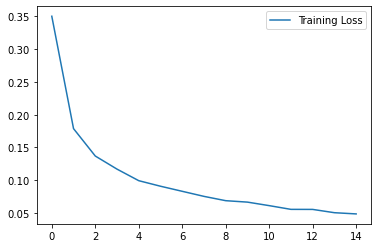

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
#plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Вот ещё нашел что fit возвращает объект по которому можно быстро построить как менялась ошибка. Визуализация - всегда хорошо.

### 3

Мне интересным аспектом мне показалась работа с временными рядами (детектирование выбросов или не нормально поведения, типа как поиск планет по кривой блеска), так как это пока вообще самое интересное и быстро применимое в каких-то реальных бизнес задачах, которые уже сейчас доступны (это я в целом про временные ряды). Но пока сложно, надо поближе с движком познакомится.